Import the relevant libraries required for this task

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler # for standardising the data
from sklearn.datasets import load_iris # For loading the dataset
from sklearn.cluster import KMeans # For kmeans clustering
from sklearn.decomposition import PCA # For PCA decomposition - dimensionality reduction


Load the data and review the data & headings

In [6]:
# Let's load the data and take a peek...
raw_data = load_iris(as_frame=True)
iris_df = raw_data.frame

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
targets = iris_df['target']
iris_df.drop('target', axis=1, inplace=True) # As clustering is unsupervised, we don't need the target column.
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

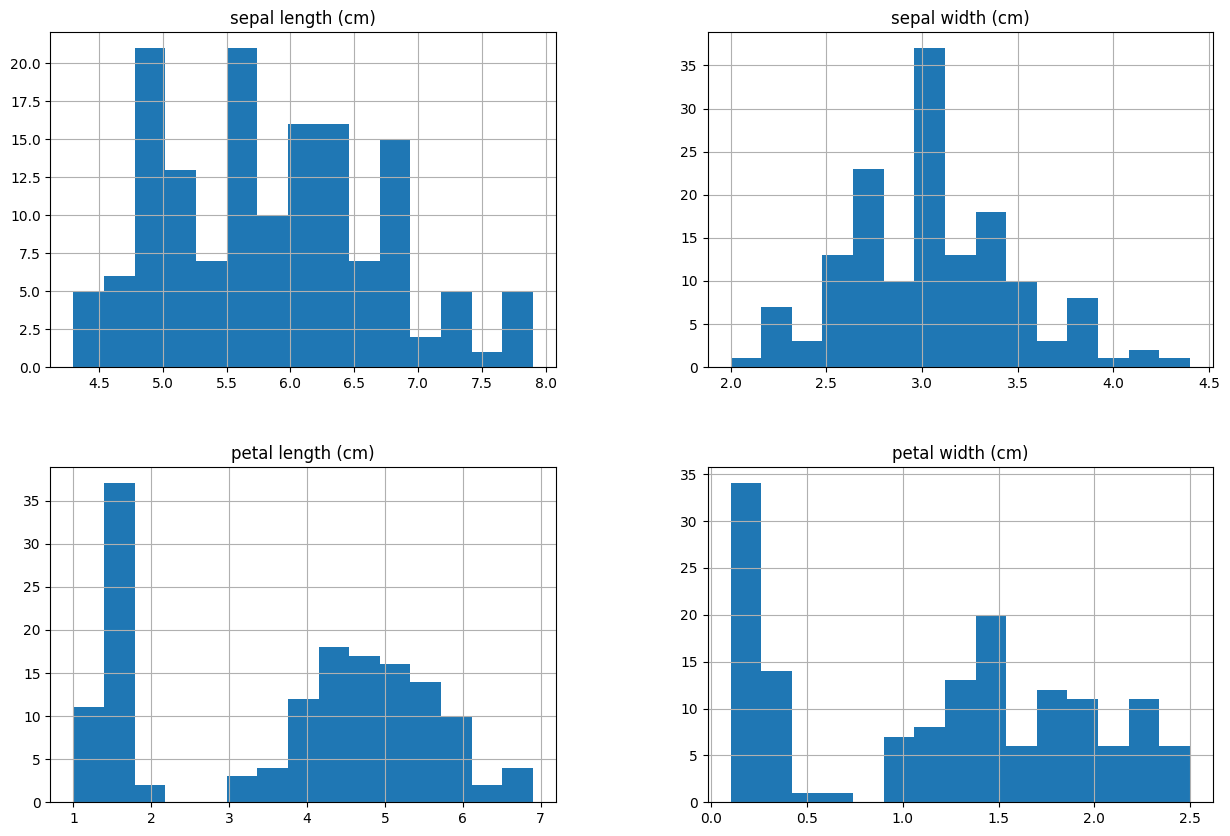

In [9]:
import matplotlib.pyplot as plt
iris_df.hist(bins=15, figsize=(15, 10))
plt.show()

<Axes: >

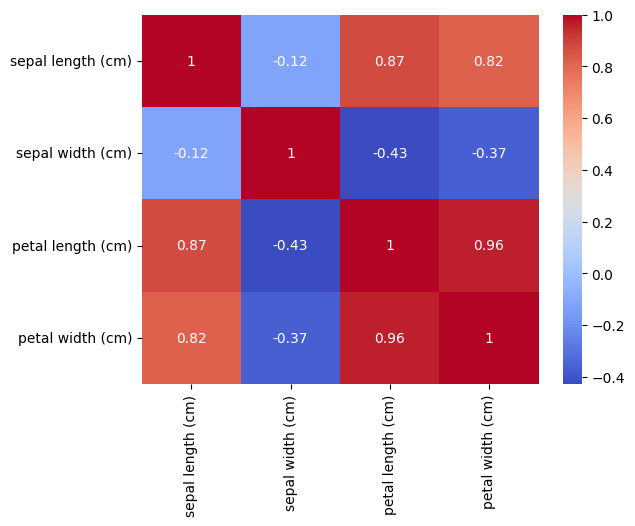

In [10]:
import seaborn as sns
corr = iris_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

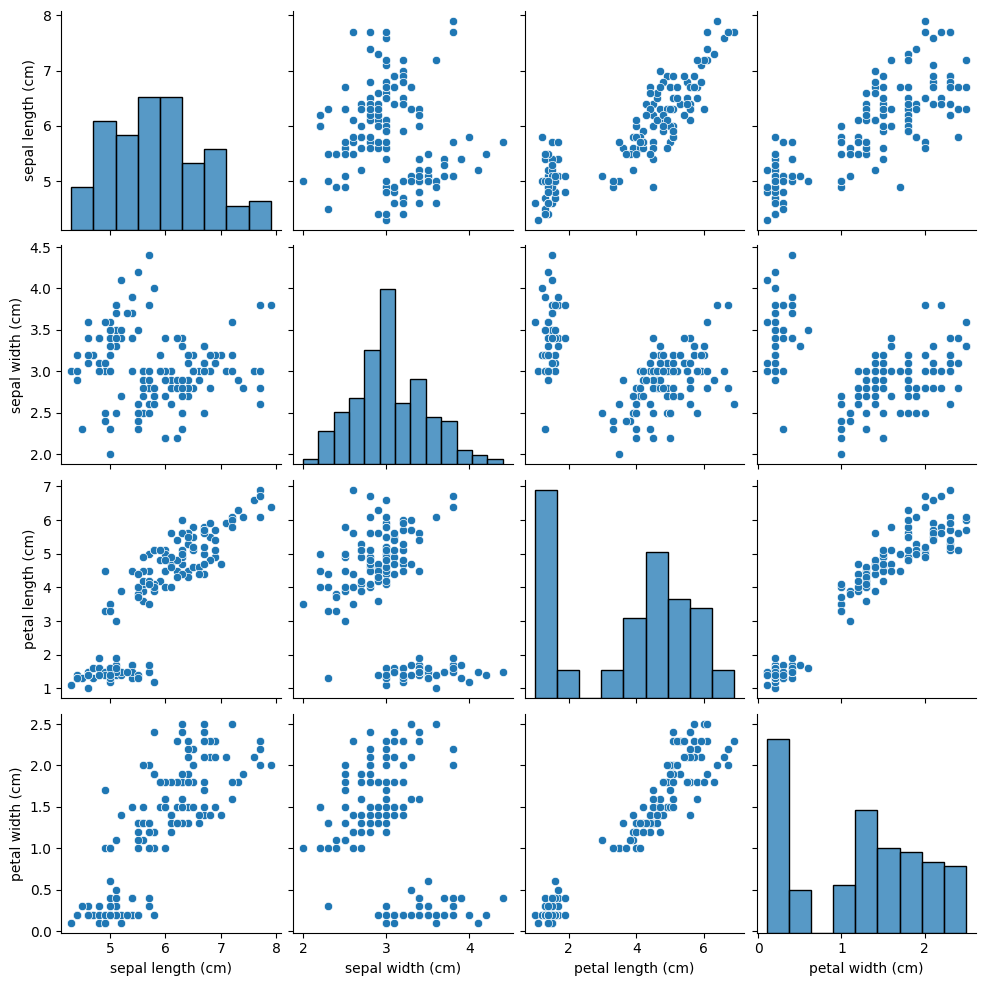

In [11]:
sns.pairplot(iris_df)

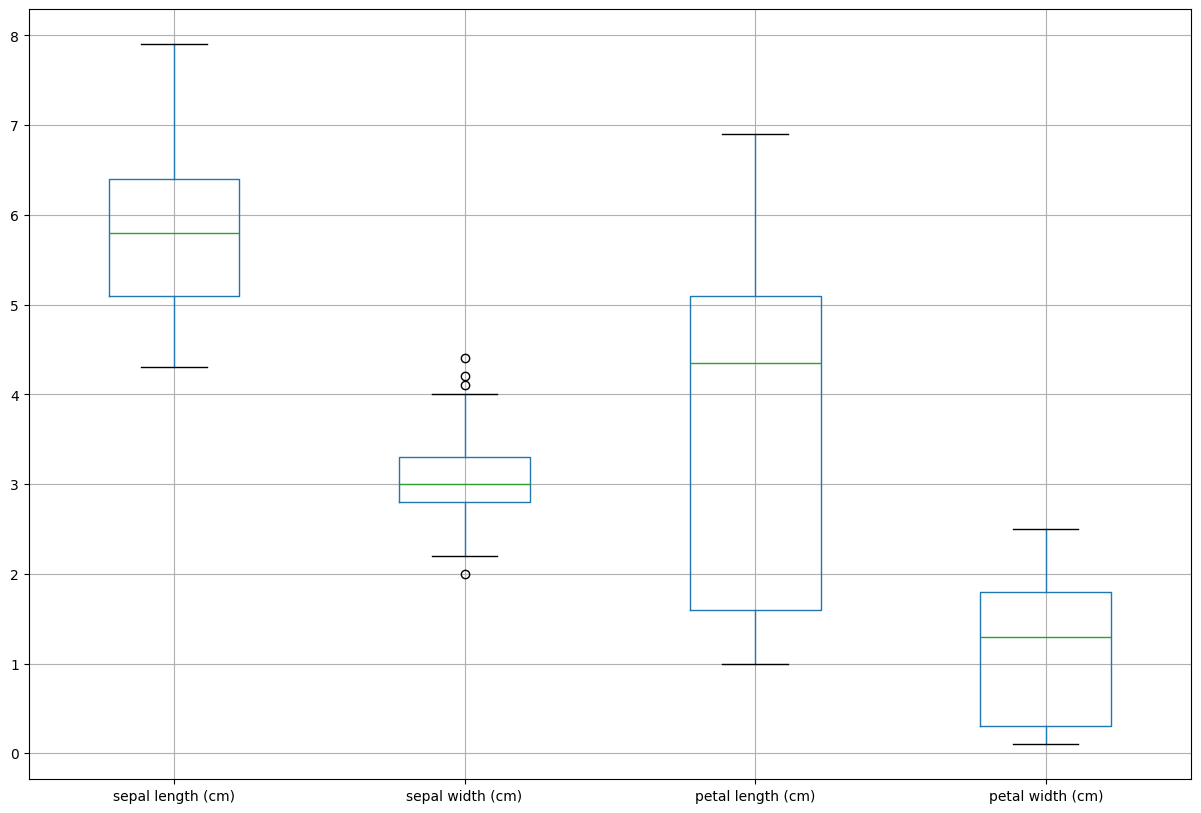

In [12]:
iris_df.boxplot(figsize=(15,10))
plt.show()

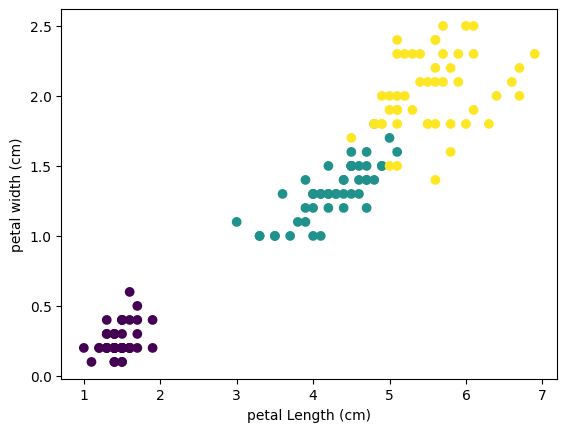

In [16]:
# Load the iris dataset as a DataFrame
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris_df = iris.frame

# Save the target values
target = iris_df['target']

# Drop the target column
iris_df.drop('target', axis=1, inplace=True)

# Now you can use the saved target values in your scatter plot
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=target)
plt.xlabel('petal Length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

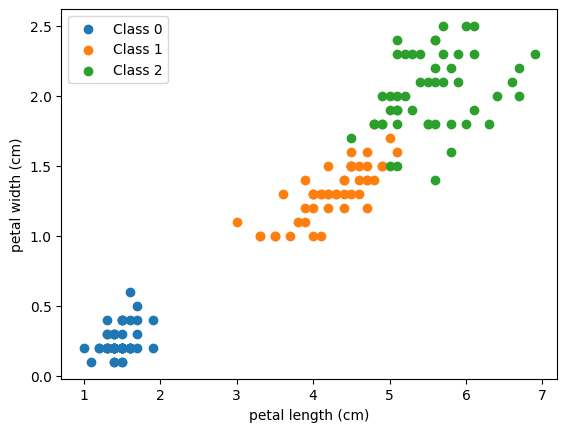

In [17]:
for i in range(3):
    plt.scatter(iris_df['petal length (cm)'][target == i], 
                iris_df['petal width (cm)'][target == i], 
                label=f'Class {i}')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [18]:
scaler = StandardScaler() # Create an instance of the scaler, this will be used to scale the data before clustering because the features are on different scales so we need to standardise them
features_ = scaler.fit(iris_df) # Fit the scaler to the training data
features = features_.transform(iris_df) # Transform the features using the scaler
scaled_df = pd.DataFrame(features, columns=iris_df.columns) # Create a dataframe from the scaled features
X = scaled_df.values # Get the values from the dataframe

scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Ignore the FutureWarning that is thrown when plotting the elbow plot

wcss = [] # Create an empty list to store the within cluster sum of squares (WCSS) for each iteration of the kmeans algorithm. The WCSS is the sum of the squared distance between each point and the centroid in a cluster. The lower the WCSS the better the clustering.
for i in range(1, 16): # Iterate through the kmeans algorithm 15 times, each time increasing the number of clusters by 1.
    kmeans_model = KMeans(n_clusters=i, random_state=42) # Create an instance of the kmeans model, setting the number of clusters, the initialisation method and the random state.
    kmeans_model.fit(X) # Fit the model to the data.
    wcss.append(kmeans_model.inertia_)

wcss

[599.9999999999999,
 222.36170496502297,
 139.8204963597497,
 114.09254690403084,
 90.92751382392046,
 81.54439095511778,
 72.63114382667185,
 62.5406056957812,
 55.11949280529059,
 47.391035176347074,
 43.46557179854024,
 40.41066736393247,
 36.72562327433481,
 34.92996430393778,
 32.919137630053896]

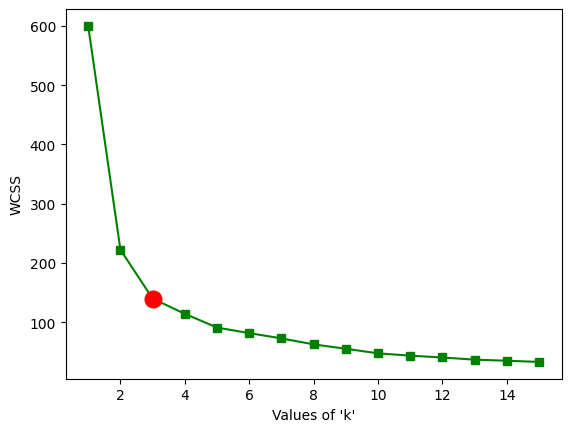

In [20]:
plt.plot([x for x in range(1, 16)], wcss, 'gs-') # Plot the elbow plot, the x axis is the number of clusters and the y axis is the WCSS.
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.plot([3], [wcss[2]], 'ro', ms=12, mfc='r') # Circle the elbow point on the plot, this is the optimal number of clusters.
plt.show() # Elbow method to determine the optimal number of clusters. The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. The optimal number of clusters is the value of k at the elbow i.e. the point after which the WCSS does not decrease significantly with every iteration.

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) # Create an instance of the kmeans algorithm with 3 clusters because the elbow method suggests that 3 is the optimal number of clusters
kmeans.fit(X)
centres = kmeans.cluster_centers_ # Get the coordinates of the centroids for each cluster. As there are 15 features, there are 15 dimensions. We can't visualise 15 dimensions so we need to reduce the dimensions to 2 using PCA

centres

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [24]:
X_ = scaled_df[['petal length (cm)', 'petal width (cm)']].values # Get the features from the dataframe

# We need the index of the features we selected to get the coordinates of the centroids for each cluster. We can get the index of the features from the dataframe.
petal_length_index = 2
petal_width_index = 3

Petal_length_centroids = centres[:, petal_length_index] # Get the coordinates of the centroids for each cluster for the alcohol feature
Petal_width_centroids = centres[:, petal_width_index] # Get the coordinates of the centroids for each cluster for the flavanoids feature

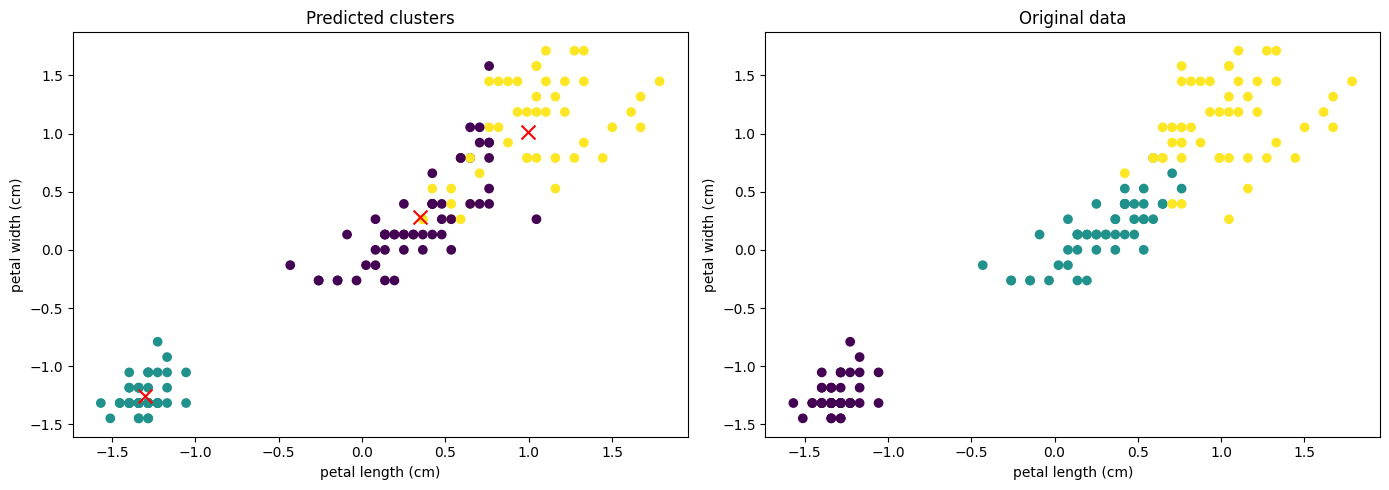

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) # Create a figure with two subplots.

ax1.scatter(X_[:,0], X_[:,1], c=kmeans.labels_) # Plot the clusters and the centroids
ax1.scatter(Petal_length_centroids[:], Petal_width_centroids[:], marker='x', s=100,c='red')
ax1.set_xlabel('petal length (cm)')
ax1.set_ylabel('petal width (cm)')
ax1.set_title('Predicted clusters')
ax2.scatter(X_[:,0], X_[:,1], c=targets) # Plot the original data with the target variable.
ax2.set_xlabel('petal length (cm)')
ax2.set_ylabel('petal width (cm)')
ax2.set_title('Original data')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

print(f'Silhouette score: {silhouette_score(X_, kmeans.labels_)}') # Get the silhouette score for the clusters

Silhouette score: 0.5160027908512373


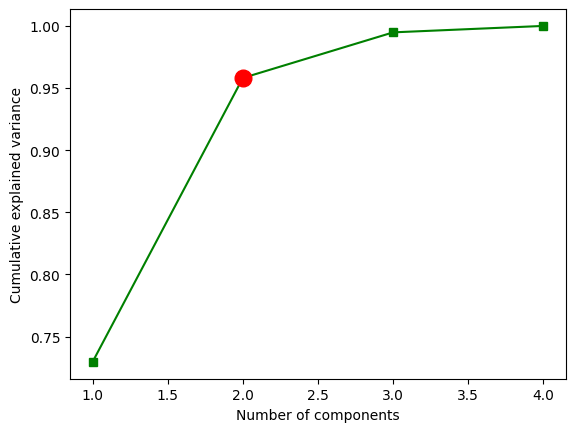

In [29]:
pca = PCA() # Create an instance of the PCA model
pca.fit(X) # Fit the model to the data
cumulative_explained_variance = [] # Create an empty list to store the cumulative explained variance for each component
for i in range(1, 5): # Iterate through the number of components
    cumulative_explained_variance.append(sum(pca.explained_variance_ratio_[:i])) # Append the cumulative explained variance for each component to the list
plt.plot([x for x in range(1, 5)], cumulative_explained_variance, 'gs-') # Plot the cumulative explained variance against the number of components
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot([2], [cumulative_explained_variance[1]], 'ro', ms=12, mfc='r') # We will use 2 components for PCA as, although it doesn't have the highest cumulative explained variance, it means we can visualise the clusters in 2 dimensions.
plt.show()

In [30]:
pca = PCA(n_components=2) # Create an instance of the PCA model with 2 components
reduced_X = pd.DataFrame(data=pca.fit_transform(X.copy()), columns=['PCA-feature1', 'PCA-feature2']) # Create a dataframe from the reduced features.
centres_pca = pca.transform(centres) # Transform the coordinates of the centroids for each cluster using the PCA algorithm.

centres_pca

array([[ 0.57262144, -0.80720888],
       [-2.22475316,  0.28892745],
       [ 1.72103664,  0.60288719]])

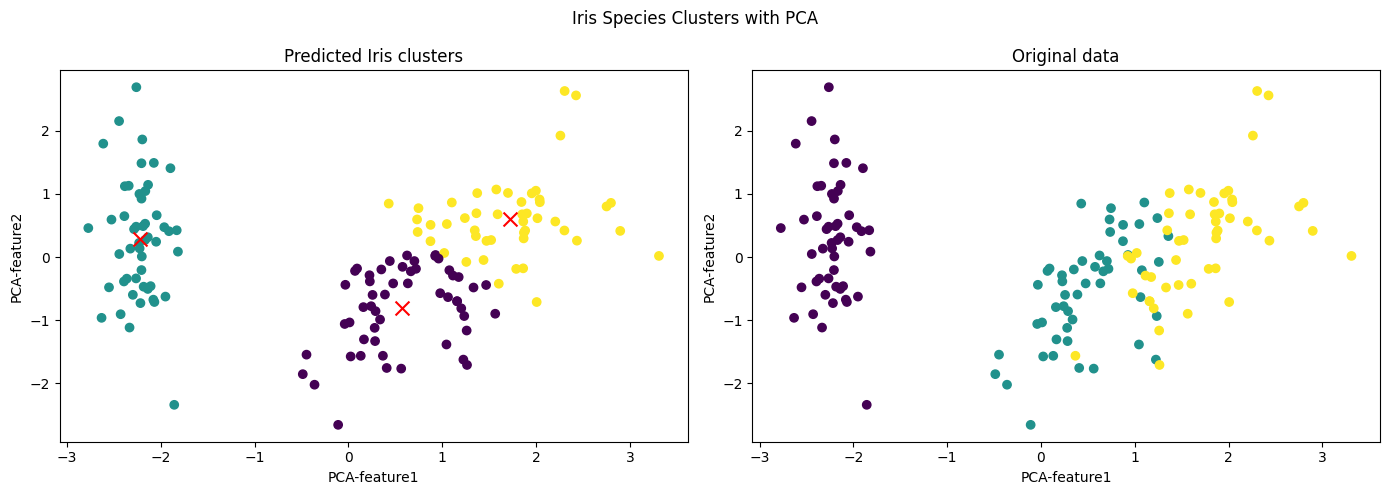

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) # Create a figure with two subplots.
fig.suptitle('Iris Species Clusters with PCA')
ax1.scatter(reduced_X['PCA-feature1'], reduced_X['PCA-feature2'], c=kmeans.labels_) # Plot the clusters and the centroids after reducing the dimensionality of the data to 2 dimensions using the PCA algorithm
ax1.scatter(centres_pca[:,0], centres_pca[:,1], marker='x', s=100,c='red')
ax1.set_xlabel('PCA-feature1')
ax1.set_ylabel('PCA-feature2')
ax1.set_title('Predicted Iris clusters')
ax2.scatter(reduced_X['PCA-feature1'], reduced_X['PCA-feature2'], c=targets) # Plot the original data with the target variable.
ax2.set_xlabel('PCA-feature1')
ax2.set_ylabel('PCA-feature2')
ax2.set_title('Original data')
plt.tight_layout()
plt.show()